# House Prices: Advanced Regression Techniques

Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

<b>Practice Skills</b>
<ul>
<li>Creative feature engineering</li>
<li>Advanced regression techniques like random forest and gradient boosting</li>
</ul>
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

In [1]:
# Load require libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainData = pd.read_csv("data/train.csv")
testData = pd.read_csv("data/test.csv")

In [3]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Check the missing values
trainData.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [7]:
testData.isna().sum().sort_values(ascending=False)[:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

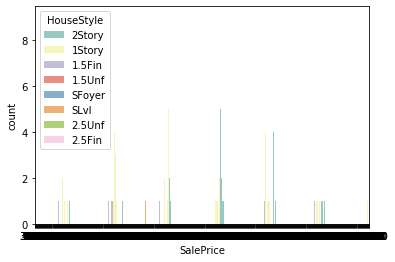

In [8]:
sns.countplot(x="SalePrice", hue='HouseStyle', data=trainData, palette="Set3")

#####  Remove the clumns where missing data is in hingh numbers

In [9]:
trainData = trainData.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
testData = testData.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [10]:
trainData.isna().sum().sort_values(ascending=False)[:20]

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

##### Handel Missing values

In [11]:
missing_data_feature = ['GarageType', 'GarageYrBlt','GarageFinish','GarageCond','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1',
'BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'Electrical']
trainData[missing_data_feature].dtypes

GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCond       object
GarageQual       object
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
MasVnrArea      float64
Electrical       object
dtype: object

###### Replacing Mising values with mean and String values with mode of the columns. 

In [12]:
from sklearn.impute import SimpleImputer
float_impute = SimpleImputer(missing_values=np.nan, strategy='mean')

trainData[['GarageYrBlt', 'MasVnrArea']] = float_impute.fit_transform(trainData[['GarageYrBlt', 'MasVnrArea']])
testData[['GarageYrBlt', 'MasVnrArea']] = float_impute.fit_transform(testData[['GarageYrBlt', 'MasVnrArea']])

In [13]:
string_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
string_var = ['GarageType', 'GarageFinish','GarageCond','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1',
'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
trainData[string_var] = string_imputer.fit_transform(trainData[string_var])
testData[string_var] = string_imputer.fit_transform(testData[string_var])

Lets Check if there is any missing value available

In [14]:
trainData.isnull().sum().sort_values(ascending=False)[:10]

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
dtype: int64

In [15]:
testData.isnull().sum().sort_values(ascending=False)[:20]

MSZoning        4
BsmtFullBath    2
Utilities       2
BsmtHalfBath    2
Functional      2
TotalBsmtSF     1
GarageArea      1
BsmtFinSF2      1
BsmtUnfSF       1
SaleType        1
Exterior2nd     1
Exterior1st     1
KitchenQual     1
GarageCars      1
BsmtFinSF1      1
Condition2      0
LotShape        0
BsmtExposure    0
MSSubClass      0
LotArea         0
dtype: int64

####  Noticed that still there is missning data in Test Data

In [16]:
missing_data_feature = ['MSZoning', 'BsmtFullBath','Utilities','BsmtHalfBath', 'Functional', 'TotalBsmtSF', 'GarageArea', 
'BsmtFinSF2', 'BsmtUnfSF', 'SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'GarageCars', 'BsmtFinSF1']
testData[missing_data_feature].dtypes

MSZoning         object
BsmtFullBath    float64
Utilities        object
BsmtHalfBath    float64
Functional       object
TotalBsmtSF     float64
GarageArea      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
SaleType         object
Exterior2nd      object
Exterior1st      object
KitchenQual      object
GarageCars      float64
BsmtFinSF1      float64
dtype: object

In [17]:
# Float Values
float_columns = ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'BsmtFinSF1']
testData[float_columns] = float_impute.fit_transform(testData[float_columns])

# String Values
string_var = ['MSZoning', 'Utilities', 'Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual']
testData[string_var] = string_imputer.fit_transform(testData[string_var])

In [18]:
testData.isnull().sum().sort_values(ascending=False)[:20]

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
RoofStyle        0
YearBuilt        0
SaleType         0
dtype: int64

###### Finally there is no missing value in Test Dataset

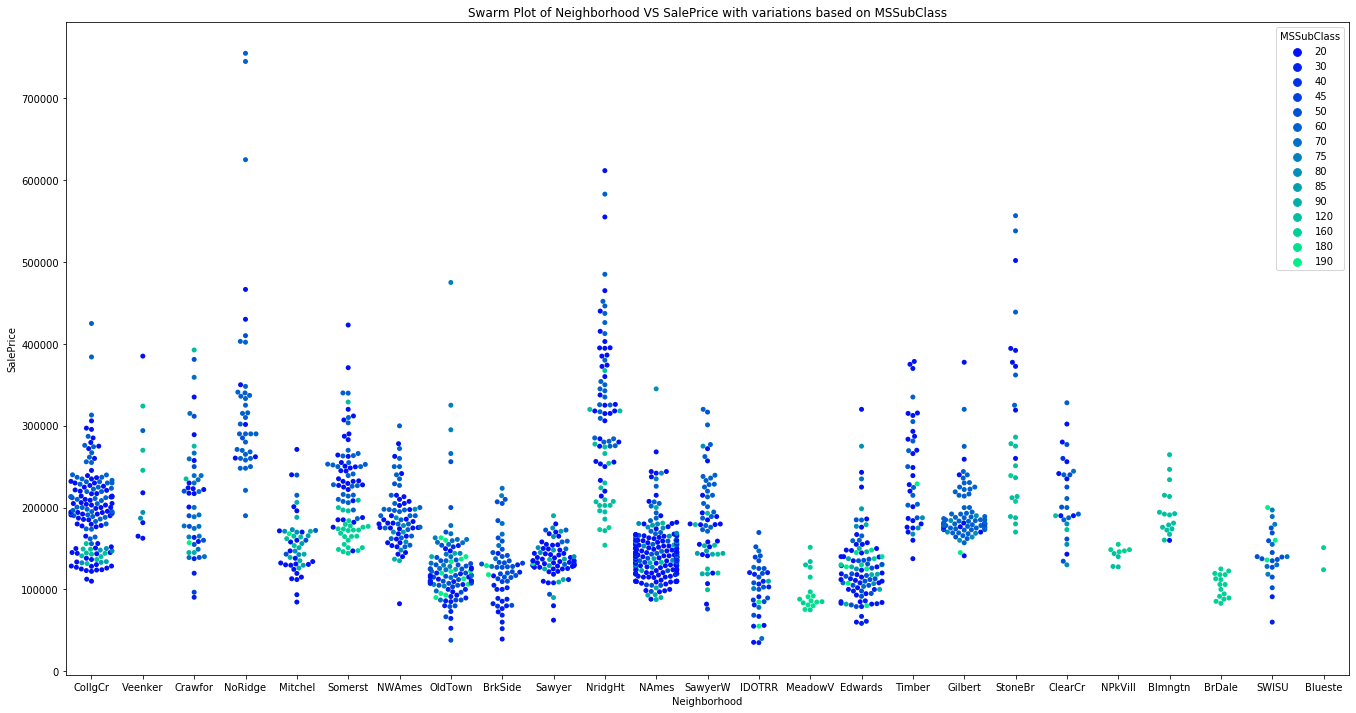

In [19]:
plt.figure(figsize=(23,12))
sns.swarmplot(trainData['Neighborhood'], trainData['SalePrice'], hue=trainData['MSSubClass'], palette='winter')
plt.title("Swarm Plot of Neighborhood VS SalePrice with variations based on MSSubClass")
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()

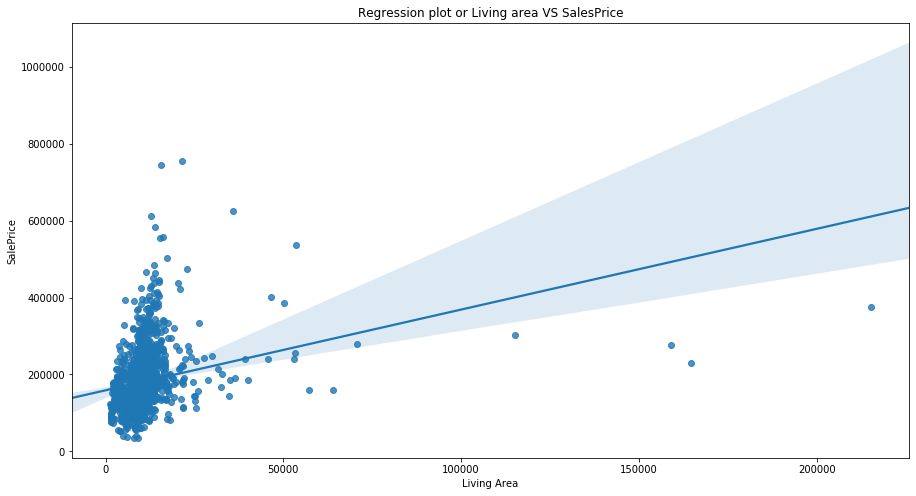

In [20]:
plt.figure(figsize=(15,8))
sns.regplot(trainData['LotArea'], trainData['SalePrice'])
plt.title("Regression plot or Living area VS SalesPrice")
plt.xlabel("Living Area")
plt.ylabel("SalePrice")
plt.show()

#### Label Encoding for Categorical Data 

In [21]:
from sklearn.preprocessing import LabelEncoder

encode_columns = ['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 
                  'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                  'CentralAir', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'
                  ]
#Train Data Set
train_le = {}
for col in encode_columns:
    train_le[col] = LabelEncoder()
    trainData[col] = train_le[col].fit_transform(trainData[col])
    
#Test Data Set 
test_le = {}
for col in encode_columns:
    test_le[col] = LabelEncoder()
    testData[col] = test_le[col].fit_transform(testData[col])


### Simply Try with Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [41]:
# Drop object columns
trainData = trainData.select_dtypes(exclude='object')
testData = testData.select_dtypes(exclude='object')

In [24]:
X = trainData.drop(['Id', 'SalePrice', 'YrSold'], axis=1)
y = trainData['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(regression.intercept_)
print(regression.coef_)

-579860.2014985349
[-7.46992189e+01  6.76425911e-01  2.81850443e+04 -9.18064639e+02
  1.87694922e+03 -3.49914618e+04  1.05641679e+02 -1.57196205e+03
 -9.81346851e+02  1.02043060e+04  5.57291099e+03  2.46591901e+02
  2.28635982e+01  2.44953463e+01 -9.61229935e+03 -7.51529115e+02
 -8.81348906e+03  1.67068015e+03 -2.62618787e+03  6.57182988e+02
  1.45145022e+01  1.66132324e+03  1.44380061e+01 -9.69505864e+00
  1.92574497e+01 -8.01258167e+02 -5.01565566e+03  2.85250826e+01
  2.70493519e+01 -3.29759627e+01  2.25984720e+01 -6.83111007e+02
 -8.65584328e+03 -1.36928546e+03  4.67818939e+02 -5.80004871e+03
 -1.70832744e+04 -8.94694807e+03  4.19461444e+03  3.68296735e+03
  3.43117807e+03  1.71502388e+01 -1.54430581e+02  6.33744648e+03
  1.01917409e+01  5.45270845e+02  1.07995049e+03  3.93411991e+02
  5.60935666e+00 -8.36404227e+00 -5.02686764e+00  6.56248773e+00
  1.49626801e+01  7.93377059e+01 -5.08009498e+00 -2.42830225e+01]


In [27]:
#Predict Value
y_pred = regression.predict(X_test)

In [28]:
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [29]:
predict['error'] = predict['Actual'] - predict['Predicted']
predict.head()

,Actual,Predicted,error
1054,255000,261385.926918,-6385.926918
361,145000,134045.201990,10954.798010
1282,150500,160597.876855,-10097.876855
161,412500,395023.351162,17476.648838
515,402861,386650.417533,16210.582467


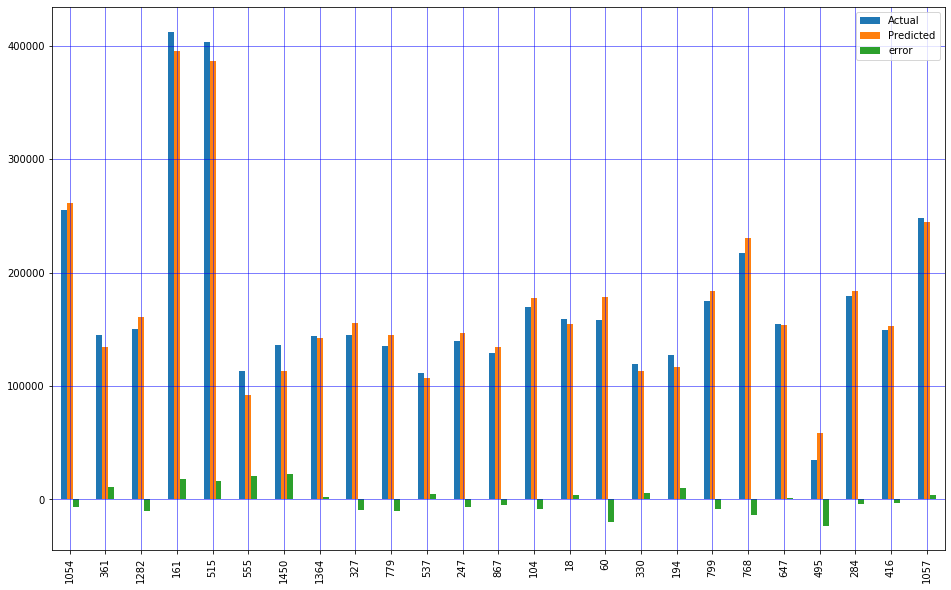

In [30]:
predict = predict.head(25)
predict.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='Blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='Blue')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19950.582613902305
Mean Squared Error: 1672124947.7870266
Root Mean Squared Error 40891.62442098658


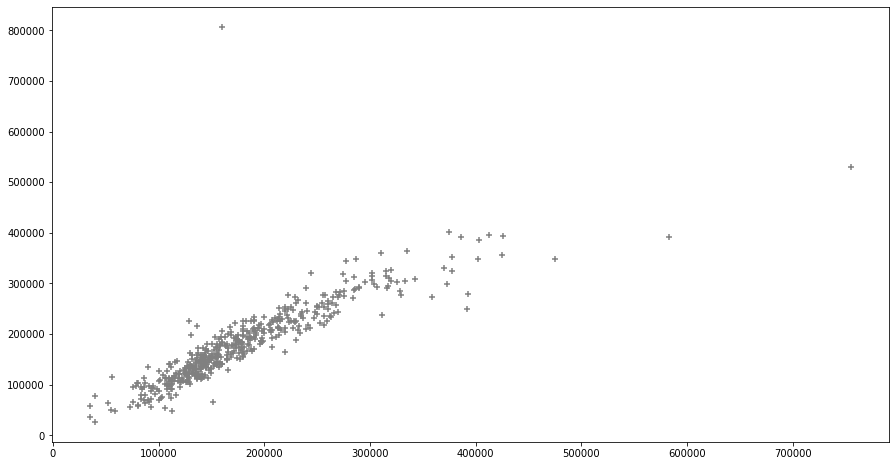

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred, color='gray', marker='+')
#plt.plot(y_test, y_pred, color='Blue', linewidth=1)
plt.show()

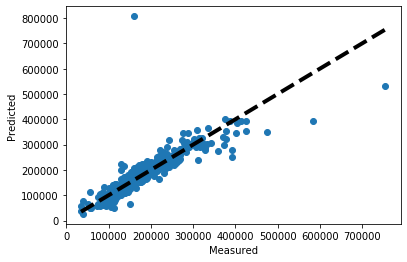

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Stochastic Gradient Descent

Now we try with SGD to check any imporovement on prediction. 

In [34]:
from sklearn import linear_model
SGDClf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, penalty='elasticnet')
SGDClf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [35]:
y_pred = SGDClf.predict(X_test)

In [36]:
SGDCpredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
SGDCpredict['error'] = SGDCpredict['Actual'] - SGDCpredict['Predicted']
SGDCpredict.head()

,Actual,Predicted,error
1054,255000,122000,133000
361,145000,122000,23000
1282,150500,122000,28500
161,412500,122000,290500
515,402861,270000,132861


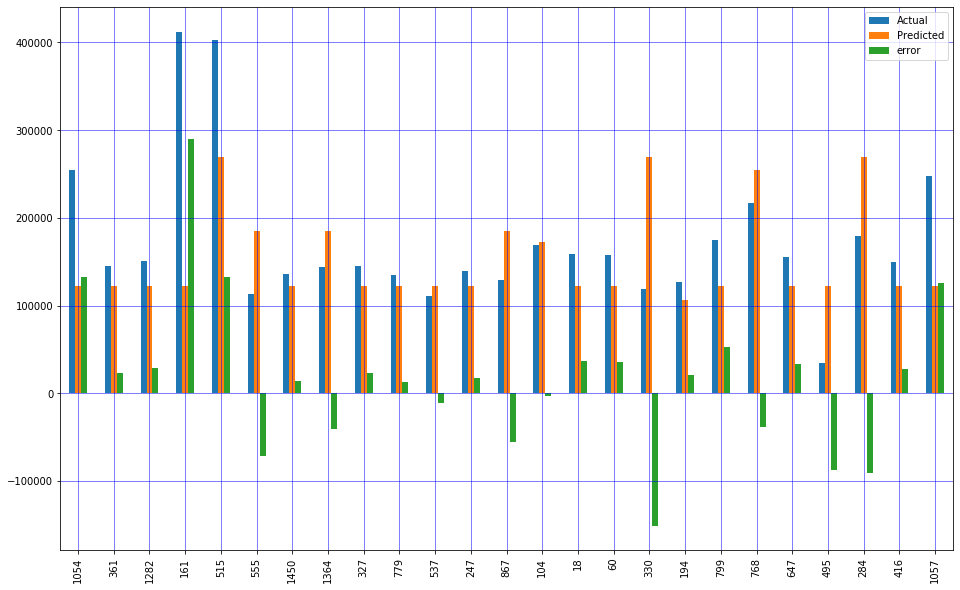

In [37]:
SGDCpredict = SGDCpredict.head(25)
SGDCpredict.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='Blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='Blue')
plt.show()

Noticed that not a great result with SGD

We use the test Dataset to Predict the value. 

In [43]:
X_testData = testData.drop(['Id', 'YrSold'], axis=1)

In [44]:
testpred = regression.predict(X_testData)

In [47]:
testPredData = pd.DataFrame({'ID': testData['Id'], 'SalePrice': testpred})

Prediction is ready now lets export for CSV. 

In [54]:
testPredData.to_csv('Sales_Price_Prediction.csv', index = False)

In [58]:
price = pd.read_csv('Sales_Price_Prediction.csv')

In [59]:
price.head()

,ID,SalePrice
0,1461,118210.569571
1,1462,108759.425380
2,1463,179363.026547
3,1464,193998.317659
4,1465,181021.808211
